<a href="https://colab.research.google.com/github/sajan-sarker/machine-learning/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

**Dataset**
*****

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

**Plot Data**
*****

In [3]:
def plot_data(X, y, ax):
  # Find Indices of Positive and Negative Examples
  pos = y == 1
  neg = y == 0
  pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
  neg = neg.reshape(-1,)

  # Plot examples
  ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c = 'red', label='y=1')
  ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=80, label='y=0', facecolors='none', edgecolors='blue', lw=3)
  ax.legend(loc='best')

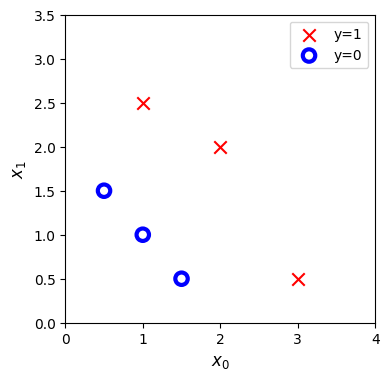

In [4]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

**Cost Function**
*****

In [5]:
# compute the sigmoid of z
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [6]:
def compute_cost_logistic(X, y, w, b):
  m = X.shape[0]
  cost = 0.0

  for i in range(m):
    z_i = np.dot(X[i], w) + b
    f_wb_i = sigmoid(z_i)
    cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

  cost = cost/m
  return cost

**Gradient Descent Implementation**
*****

In [7]:
def compute_gradient_logistic(X, y, w, b):
  """
  Computes the gradient for logistic regression

  Args:
    X (ndarray (m,n): Data, m examples with n features
    y (ndarray (m,)): target values
    w (ndarray (n,)): model parameters
    b (scalar)      : model parameter
  Returns
    dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
    dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
  """
  m, n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w) + b)   # (n,)(,n) = scalar
    err_i = f_wb_i - y[i]  # scalar
    for j in range(n):
      dj_dw[j] = dj_dw[j] + err_i * X[i,j]  # scalar
    dj_db = dj_db + err_i
  dj_dw = dj_dw / m   # (n,)
  dj_db = dj_db / m   # scalar

  return dj_db, dj_dw

In [8]:
# test gradient
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.

dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [10]:
# Gradient Descent Code

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
  """
  Performs batch gradient descent

  Args:
    X (ndarray (m,n)   : Data, m examples with n features
    y (ndarray (m,))   : target values
    w_in (ndarray (n,)): Initial values of model parameters
    b_in (scalar)      : Initial values of model parameter
    alpha (float)      : Learning rate
    num_iters (scalar) : number of iterations to run gradient descent

  Returns:
    w (ndarray (n,))   : Updated values of parameters
    b (scalar)         : Updated value of parameter
  """
  J_hist = [] # An array to store cost J and w's at each iteration primarily for graphing later
  w = copy.deepcopy(w_in) # avoid modifying global w within function
  b = b_in

  for i in range(num_iters):
    # calculate the gradient and update the parameters
    dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

    # update parmeters using w, b, alpha and gradient
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    # save cost J at each iteration
    if i < 100000:   # prevent resource exhaustion
      J_hist. append(compute_cost_logistic(X, y, w, b))

    # print cost every at intervals 10 times or as many iteration if < 10
    if i %math.ceil(num_iters/10) == 0:
      print(f"Iteration {i:4d}: cost {J_hist[-1]}")

  return w, b, J_hist

In [11]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: cost 0.684610468560574
Iteration 1000: cost 0.1590977666870457
Iteration 2000: cost 0.08460064176930078
Iteration 3000: cost 0.05705327279402531
Iteration 4000: cost 0.04290759421682
Iteration 5000: cost 0.03433847729884557
Iteration 6000: cost 0.02860379802212006
Iteration 7000: cost 0.02450156960879306
Iteration 8000: cost 0.02142370332569295
Iteration 9000: cost 0.019030137124109114

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


In [17]:
def plt_prob(ax, w_out,b_out):
    """ plots a decision boundary but include shading to indicate the probability """
    #setup useful ranges and common linspaces
    x0_space  = np.linspace(0, 4 , 100)
    x1_space  = np.linspace(0, 4 , 100)

    # get probability for x0,x1 ranges
    tmp_x0,tmp_x1 = np.meshgrid(x0_space,x1_space)
    z = np.zeros_like(tmp_x0)
    for i in range(tmp_x0.shape[0]):
        for j in range(tmp_x1.shape[1]):
            z[i,j] = sigmoid(np.dot(w_out, np.array([tmp_x0[i,j],tmp_x1[i,j]])) + b_out)





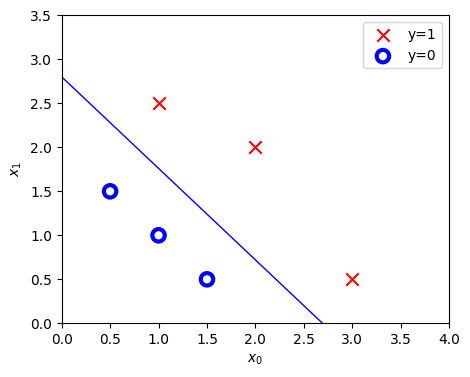

In [21]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

# plot the probability
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c='blue', lw=1)
plt.show()